In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Tarea 5. Clustering.**
   

In [ ]:
!pip install pysal
!pip install contextily
!pip install geopandas 
!pip install sklearn
!pip install -U scikit-learn

     |████████████████████████████████| 2.4 MB 13.3 MB/s 
     |████████████████████████████████| 95 kB 2.3 MB/s 
     |████████████████████████████████| 60 kB 4.6 MB/s 
     |████████████████████████████████| 55 kB 947 kB/s 
     |████████████████████████████████| 164 kB 29.3 MB/s 
     |████████████████████████████████| 45 kB 1.1 MB/s 
     |████████████████████████████████| 41 kB 227 kB/s 
     |████████████████████████████████| 209 kB 80.7 MB/s 
     |████████████████████████████████| 5.7 MB 77.5 MB/s 
     |████████████████████████████████| 64 kB 2.1 MB/s 
     |████████████████████████████████| 138 kB 23.2 MB/s 
     |████████████████████████████████| 226 kB 59.2 MB/s 
     |████████████████████████████████| 240 kB 64.3 MB/s 
     |████████████████████████████████| 56.1 MB 29 kB/s 
     |████████████████████████████████| 183 kB 52.3 MB/s 
     |████████████████████████████████| 111 kB 68.0 MB/s 
     |████████████████████████████████| 994 kB 68.3 MB/s 
     |█████████████████████

     |████████████████████████████████| 22.3 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node__interactivity = "all"
%matplotlib inline 
import contextily as ctx
from pysal.lib import weights
from pysal.lib import cg as geometry
from pysal.explore import esda
from pysal.viz import splot
import seaborn as sns
import geopandas as gpd
from pysal.lib import weights
from pysal.lib import cg as geometry
from pysal.explore import esda
from pysal.viz import splot
from sklearn import cluster
from pysal.lib import weights as ct
np.random.seed(123)

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
abb = gpd.read_file('/content/drive/MyDrive/Geoinformatica/Proyecto/shapes/shapes cultivos ilicitos/2017ci_clean.shp') 

In [ ]:
# Fija el CRS manualmente. 
abb.crs = {'init': u'epsg:3685'}
abb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CVEGEO    62 non-null     object  
 1   CVE_ENT   62 non-null     object  
 2   CVE_MUN   62 non-null     object  
 3   NOMGEO    62 non-null     object  
 4   NoPM2017  62 non-null     int64   
 5   NoPA2017  62 non-null     int64   
 6   HcPM2017  62 non-null     float64 
 7   HcPA2017  62 non-null     float64 
 8   geometry  62 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 4.5+ KB


####Definición de variables 

In [ ]:
ratings = [  'NoPM2017', 'HcPM2017' ]

#####Mapas de variables 

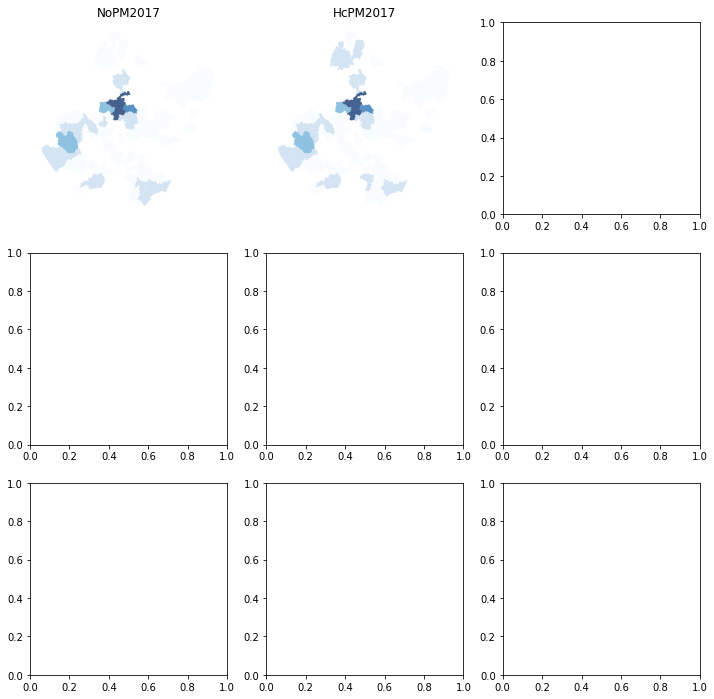

In [ ]:
# Crea figura y ejes (en este caso es un arreglo de 3 x 3)
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
# Hace los ejes accesibles con una sola indexación
axs = axs.flatten()
# Comienza el loop sobre las variables de interés
for i, col in enumerate(ratings):
    # Selecciona el eje en el que el irá el mapa.
    ax = axs[i]
    # Grafica el mapa
    abb.plot(column=col, ax=ax, scheme='naturalbreaks', \
             linewidth=0, cmap='Blues', alpha=0.75)
    # Remueve "basura" del eje
    ax.set_axis_off()
    # Le pone el nombre de la variable a cada eje
    ax.set_title(col)
# Despliega la figura
plt.show()

####Correlación de variables 

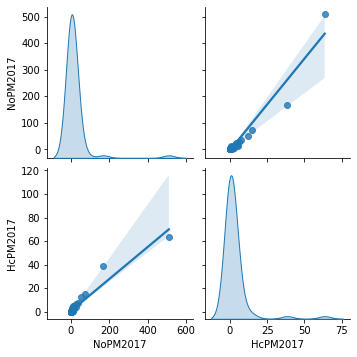

In [ ]:
_ = sns.pairplot(abb[ratings], kind='reg', diag_kind='kde')

####Clasificación geodemográfica con K-means

In [ ]:
kmeans5 = cluster.KMeans(n_clusters=5)

In [ ]:
kmeans5

KMeans(n_clusters=5)

In [ ]:
# Esta línea se utiliza para obtener el mismo resultado siempre que se replique el análisis
np.random.seed(1234)
# Ejecuta el algoritmo de agrupamiento
k5cls = kmeans5.fit(abb[ratings])

In [ ]:
k5cls.labels_

array([3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 4, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3,
       4, 3, 3, 0, 3, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3], dtype=int32)

In [ ]:
abb['k5cls'] = k5cls.labels_

####Mapa de categorías

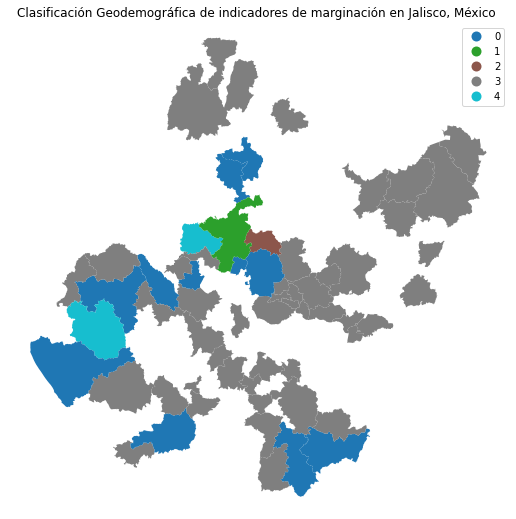

In [ ]:
# Ajusta figura y ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Graficar valores únicos coropletas incluyendo una leyenda y sin líneas de límite
abb.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
# Remueve ejes
ax.set_axis_off()
# Mentiene los ejes proporcionados
plt.axis('equal')
# Agrega título
plt.title('Clasificación Geodemográfica de indicadores de marginación en Jalisco, México ')
# Despliega el mapa
plt.show()

####Número de observaciones por cada categoría

In [ ]:
k5sizes = abb.groupby('k5cls').size()
k5sizes

k5cls
0    11
1     1
2     1
3    47
4     2
dtype: int64

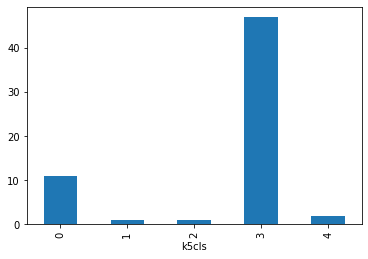

In [ ]:
_ = k5sizes.plot.bar()

####Valor promedio de cada variable por categoría 

In [ ]:
k5means = abb.groupby('k5cls')[ratings].mean()
# Muestra la tabla transpuesta
k5means.T

k5cls,0,1,2,3,4
NoPM2017,18.363636,510.0000,169.0000,1.744681,62.00000
HcPM2017,3.866664,63.6228,38.4668,0.330249,13.62655


####Promedio, desviación estándar y cuartiles de cada variable por categoría

In [ ]:
# Calcular el summary 
# Si deseas desplegar todas las columnas descomenta la siguiente línea
#pd.set_option("display.max_columns", None)
k5desc = abb.groupby('k5cls')[ratings].describe()
# Muestra la tabla
k5desc

NoPM2017                         ...  HcPM2017                    
         count        mean        std  ...       50%        75%      max
k5cls                                  ...                              
0         11.0   18.363636   8.065640  ...   4.23000   5.026000   7.1475
1          1.0  510.000000        NaN  ...  63.62280  63.622800  63.6228
2          1.0  169.000000        NaN  ...  38.46680  38.466800  38.4668
3         47.0    1.744681   2.591525  ...   0.00000   0.422400   2.9400
4          2.0   62.000000  15.556349  ...  13.62655  14.389825  15.1531

[5 rows x 16 columns]

In [ ]:
#Otra forma de representar los resultados de la tabla anterior
for clus in k5desc.T:
    print('\n\t---------\n\tCluster %i'%clus)
    print(k5desc.T[clus].unstack())


	---------
	Cluster 0
          count       mean       std      min      25%    50%     75%      max
NoPM2017   11.0  18.363636  8.065640  11.0000  13.0000  15.00  21.500  37.0000
HcPM2017   11.0   3.866664  2.037802   0.8025   2.7892   4.23   5.026   7.1475

	---------
	Cluster 1
          count      mean  std  ...       50%       75%       max
NoPM2017    1.0  510.0000  NaN  ...  510.0000  510.0000  510.0000
HcPM2017    1.0   63.6228  NaN  ...   63.6228   63.6228   63.6228

[2 rows x 8 columns]

	---------
	Cluster 2
          count      mean  std  ...       50%       75%       max
NoPM2017    1.0  169.0000  NaN  ...  169.0000  169.0000  169.0000
HcPM2017    1.0   38.4668  NaN  ...   38.4668   38.4668   38.4668

[2 rows x 8 columns]

	---------
	Cluster 3
          count      mean       std  min  25%  50%     75%   max
NoPM2017   47.0  1.744681  2.591525  0.0  0.0  0.0  3.0000  9.00
HcPM2017   47.0  0.330249  0.625238  0.0  0.0  0.0  0.4224  2.94

	---------
	Cluster 4
          cou

In [ ]:
# Nombrar (index) los renglones por la categoría a la que pertenecen 
to_plot = abb.set_index('k5cls')
# Subconjutno que solo mantiene las variables utilizadas por el K-Means
to_plot = to_plot[ratings]
# Muestra la tabla
to_plot.head()

,NoPM2017,HcPM2017
k5cls,,
3,0,0.0000
0,14,2.5204
3,8,1.0940
3,0,0.0000
3,0,0.0000


In [ ]:
to_plot = to_plot.stack()
to_plot.head()

k5cls          
3      NoPM2017     0.0000
       HcPM2017     0.0000
0      NoPM2017    14.0000
       HcPM2017     2.5204
3      NoPM2017     8.0000
dtype: float64

In [ ]:
to_plot = to_plot.reset_index()
to_plot.head()

,k5cls,level_1,0
0,3,NoPM2017,0.0000
1,3,HcPM2017,0.0000
2,0,NoPM2017,14.0000
3,0,HcPM2017,2.5204
4,3,NoPM2017,8.0000


In [ ]:
to_plot = to_plot.rename(columns={'level_1': 'Variable', 0: 'Valor'})
to_plot.head()

,k5cls,Variable,Valor
0,3,NoPM2017,0.0000
1,3,HcPM2017,0.0000
2,0,NoPM2017,14.0000
3,0,HcPM2017,2.5204
4,3,NoPM2017,8.0000


####Distribución de valores por categoría

KeyError: ignored

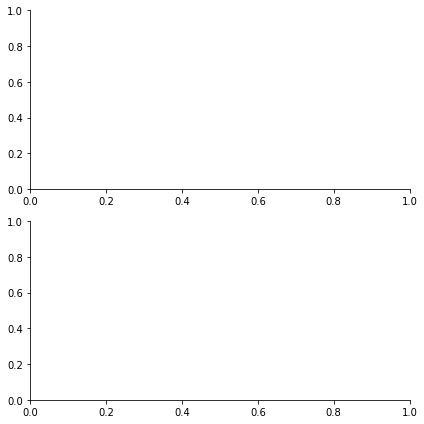

In [ ]:
# Setup the facets
facets = sns.FacetGrid(data=to_plot, row='Variable', hue='k5cls', \
                  sharey=False, sharex=False, aspect=2)
# Build the plot as a `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

####Agrupamiento jerárquico 

In [ ]:
  # Siembra semilla para que el resultado sea reproducible
np.random.seed(0)
# Inicia el algoritmo, la opción ward minimiza la varianza de los cúmulos que se fusionan
model = cluster.AgglomerativeClustering(linkage='ward', n_clusters=5)
# Ejecuta el agrupamiento
model.fit(abb[ratings])
# Asigna etiquetas a la tabla
abb['clus_ahc'] =model.labels_

In [ ]:
ahc_size = abb.groupby('clus_ahc').size()
ahc_size

clus_ahc
0    11
1    47
2     1
3     1
4     2
dtype: int64

In [ ]:
ahc_means = abb.groupby('clus_ahc')[ratings].mean()
ahc_means.T

clus_ahc,0,1,2,3,4
NoPM2017,18.363636,1.744681,169.0000,510.0000,62.00000
HcPM2017,3.866664,0.330249,38.4668,63.6228,13.62655


In [ ]:
# Index db on cluster ID
tidy_db = abb.set_index('clus_ahc')
# Keep only variables used for clustering
tidy_db = tidy_db[ratings]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
# Check out result
tidy_db.head()

,clus_ahc,Attribute,Values
0,1,NoPM2017,0.0000
1,1,HcPM2017,0.0000
2,0,NoPM2017,14.0000
3,0,HcPM2017,2.5204
4,1,NoPM2017,8.0000


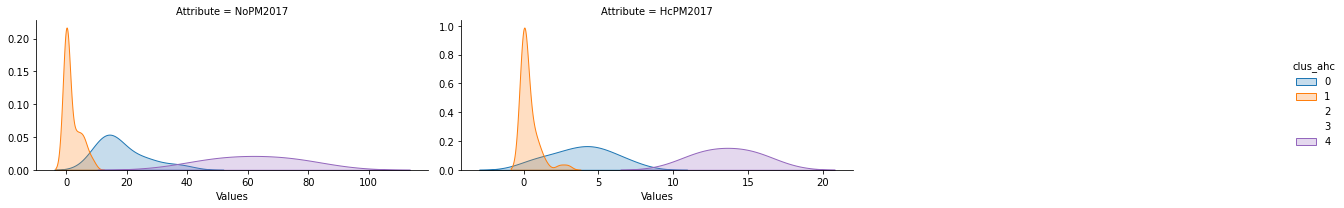

In [ ]:
# Setup the facets
facets = sns.FacetGrid(data=tidy_db, col='Attribute', hue='clus_ahc', \
                  sharey=False, sharex=False, aspect=2, col_wrap=3)
# Build the plot as a `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

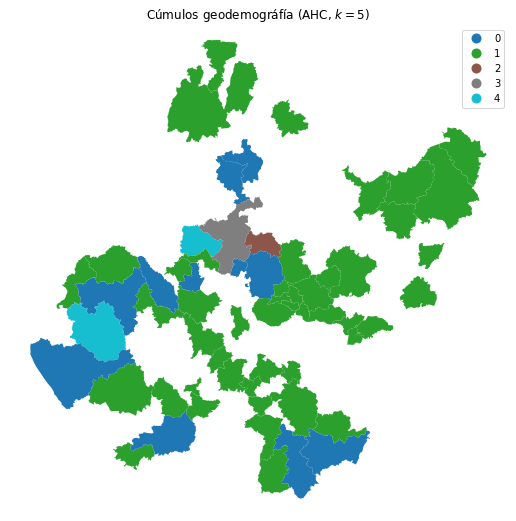

In [ ]:
abb['clus_ahc'] =model.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
abb.plot(column='clus_ahc', categorical=True, legend=True, linewidth=0, ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title('Cúmulos geodemográfía (AHC, $k=5$)')
# Display the map
plt.show()

####Regionalización

In [ ]:
# Se crea la matriz de pesos por contiguidad de reina
w_queen = ct.Queen.from_dataframe(abb)
w_queen.islands
# La matriz tiene al menos un elemento sin contiguidad

[8, 21, 38, 58]

In [ ]:
#Para solucionar el problema se crea la matriz de vecinos más cercanos de orden 1
w_k1 = ct.KNN.from_dataframe(abb, k=1)
w_k1.islands

[]

In [ ]:
# Y se mezclan ambas matrices para asegurar que todos los elementos tengan al menos una interacción
w_queen.islands

[8, 21, 38, 58]

In [ ]:
sagg13 = cluster.AgglomerativeClustering(n_clusters=13, connectivity=w_queen.sparse)
sagg13

AgglomerativeClustering(connectivity=<62x62 sparse matrix of type '<class 'numpy.float64'>'
	with 176 stored elements in Compressed Sparse Row format>,
                        n_clusters=13)

In [ ]:
# This line is required to obtain the same results always
np.random.seed(1234)
# Run the clustering algorithm
sagg13cls = sagg13.fit(abb[ratings])

In [ ]:
abb['sagg13cls'] = sagg13cls.labels_

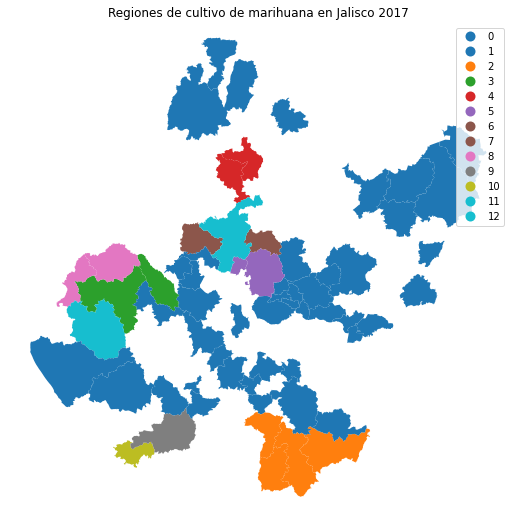

In [ ]:
# Ajusta figura y ejes
f, ax = plt.subplots(1, figsize=(9, 9))
# Grafica por coro´pletas
abb.plot(column='sagg13cls', categorical=True, legend=True, linewidth=0, ax=ax)
# Remueve ejes
ax.set_axis_off()
# mantiene los ejes proporcionados
plt.axis('equal')
#AGrega título
plt.title('Regiones de cultivo de marihuana en Jalisco 2017')
# Muestra el mapo
plt.show()

In [ ]:
def dissolve(gs):
    '''
    Take a series of polygons and dissolve them into a single one
    
    Arguments
    ---------
    gs        : GeoSeries
                Sequence of polygons to be dissolved
    Returns
    -------
    dissolved : Polygon
                Single polygon containing all the polygons in `gs`
    '''
    return gs.unary_union

In [ ]:
# Dissolve de los polígonos basados en `sagg13cls`
abb_boroughs = gpd.GeoSeries(abb.groupby(abb['sagg13cls'])\
                                .apply(dissolve),
                             crs=abb.crs)

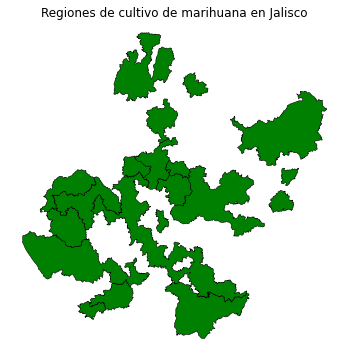

In [ ]:
# AJusta figura y ejes
f, ax = plt.subplots(1, figsize=(6, 6))
# Grafica las líneas de límites
abb_boroughs.plot(ax=ax, linewidth=0.5,\
                  facecolor='green', edgecolor='k')
# Remueve ejes
ax.set_axis_off()
# mantiene los ejes proporcionales
plt.axis('equal')
# Agrega título
plt.title('Regiones de cultivo de marihuana en Jalisco')
# Despliega el mapa
plt.show()